In [4]:
import pathlib
import zarr
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Downres the raw imagery to u8
path_to_zarr = pathlib.Path('../data/Burrow_Images.u16.mip2.zarr')
array = zarr.open(path_to_zarr, mode='r')
print(array.shape)

(631, 842, 1555)


In [10]:
# plt.hist(np.ravel(array[:]), bins=100)
# plt.show() # 20sec

vmin = 10_000
vmax = 40_000

In [12]:
# Map to 0-255
array_u8 = (np.array(array) - vmin) / (vmax - vmin) * 255

In [16]:
array_u8[array_u8 > 255] = 255

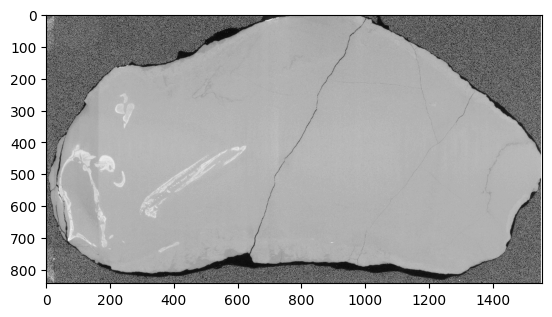

In [17]:
# plt.hist(np.ravel(array_u8[:]), bins=100)

plt.imshow(array_u8[300], cmap='gray')

In [18]:
# Save as u8
path_to_zarr_u8 = pathlib.Path('../data/Burrow_Images.u8.mip2.zarr')
u8_zarr = zarr.open(path_to_zarr_u8, mode='w', shape=array_u8.shape, chunks=(256, 256, 256), dtype='u1')
u8_zarr[:] = array_u8